<a href="https://colab.research.google.com/github/coryskeers/dl_phones/blob/master/phonemer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download updated CMU ARPABET dictionaries and definitions if they aren't available:
import os.path

if not os.path.exists('cmudict-0.7b.symbols'):
  !wget http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b.symbols
#!wget http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b.phones
if not os.path.exists('cmudict-0.7b'):
  !wget http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b

# Build our phoneme descriptions
# Based on 'Poetic Sound Similarity Vectors Using Phonetic Features' which uses X-SAMPA phoneme descriptions
# Allison Parrish; 2017
# https://aaai.org/ocs/index.php/AIIDE/AIIDE17/paper/download/15879/15227
phone_defs = {
    'AA' : ['bck', 'low', 'unr', 'vwl'],
    'AE' : ['fnt', 'low', 'unr', 'vwl'],
    'AH' : ['cnt', 'mid', 'unr', 'vwl'],
    'AO' : ['bck', 'lmd', 'rnd', 'vwl'],
    'AW' : ['bck', 'cnt', 'low', 'rnd', 'smh', 'unr', 'vwl'],
    'AY' : ['cnt', 'fnt', 'low', 'smh', 'unr', 'vwl'],
    'B' : ['blb', 'stp', 'vcd'],
    'CH' : ['alv', 'frc', 'stp', 'vls'],
    'D' : ['alv', 'stp', 'vcd'],
    'DH' : ['dnt', 'frc', 'vcd'],
    'EH' : ['fnt', 'lmd', 'unr', 'vwl'],
    'ER' : ['cnt', 'rzd', 'umd', 'vwl'],
    'EY' : ['fnt', 'lmd', 'smh', 'unr', 'vwl'],
    'F' : ['frc', 'lbd', 'vls'],
    'G' : ['stp', 'vcd', 'vel'],
    'HH' : ['apr', 'glt'],
    'IH' : ['fnt', 'smh', 'unr', 'vwl'],
    'IY' : ['fnt', 'hgh', 'unr', 'vwl'],
    'JH' : ['alv', 'frc', 'stp', 'vcd'],
    'K' : ['stp', 'vel', 'vls'],
    'L' : ['alv', 'lat'],
    'M' : ['blb', 'nas'],
    'N' : ['alv', 'nas'],
    'NG' : ['nas', 'vel'],
    'OW' : ['bck', 'rnd', 'smh', 'umd', 'vwl'],
    'OY' : ['bck', 'fnt', 'lmd', 'rnd', 'smh', 'unr', 'vwl'],
    'P' : ['blb', 'stp', 'vls'],
    'R' : ['alv', 'apr'],
    'S' : ['alv', 'frc', 'vls'],
    'SH' : ['frc', 'pla', 'vls'],
    'T' : ['alv', 'stp', 'vls'],
    'TH' : ['dnt', 'frc', 'vls'],
    'UH' : ['bck', 'rnd', 'smh', 'vwl'],
    'UW' : ['bck', 'hgh', 'rnd', 'vwl'],
    'V' : ['frc', 'lbd', 'vcd'],
    'W' : ['apr', 'lbv'],
    'Y' : ['apr', 'pal'],
    'Z' : ['alv', 'frc', 'vcd'],
    'ZH' : ['frc', 'pla', 'vcd'],
    '<beg>' : [],
    '<end>' : [],
    'NULL' : []
}

# Get all symbol combos and create an indexer
with open('cmudict-0.7b.symbols') as symfile:
  phone_index = {}
  index_phone = {}
  for i, line in enumerate(symfile):
    phone_index[line.strip()] = i
    index_phone[i] = line.strip()
  phone_index['<beg>'] = len(list(phone_index.keys()))
  phone_index['<end>'] = len(list(phone_index.keys()))
  phone_index['NULL'] = len(list(phone_index.keys()))
  index_phone[phone_index['<beg>']] = '<beg>'
  index_phone[phone_index['<end>']] = '<end>'
  index_phone[phone_index['NULL']] = 'NULL'

# Get our word-phoneme dict. First 69 lines are documentation and/or symbol pronunciations.
with open('cmudict-0.7b', encoding = 'latin-1') as pronfile:
  word_pron = {}
  pron_word = {}
  for _ in range(69):
    next(pronfile)
  skip = False
  for line in pronfile:
    entry = line.strip().split('  ', 1)
    # Currently skipping any entries with symbols, including alternate pronunciations.
    if 2 < len(entry[0]) < 15 and entry[0][0].isalpha() and entry[0][-1] != '.':
      for c in "-'()+,.!?/1234567890:; _ÉÀ{}":
        if c in entry[0]:
          skip = True
      if not skip:
        # Add a 'break' token at the beginning and end of the word
        word_pron[entry[0]] = ['<beg>'] + entry[1].split() + ['<end>']
        pron_word[entry[1]] = entry[0]
    skip = False

--2020-04-30 18:55:57--  http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b.symbols
Resolving svn.code.sf.net (svn.code.sf.net)... 216.105.38.17
Connecting to svn.code.sf.net (svn.code.sf.net)|216.105.38.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281 [text/plain]
Saving to: ‘cmudict-0.7b.symbols’

cmudict-0.7b.symbol 100%[===================>]     281  --.-KB/s    in 0s      

2020-04-30 18:55:57 (38.7 MB/s) - ‘cmudict-0.7b.symbols’ saved [281/281]

--2020-04-30 18:55:57--  http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b
Resolving svn.code.sf.net (svn.code.sf.net)... 216.105.38.17
Connecting to svn.code.sf.net (svn.code.sf.net)|216.105.38.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716714 (3.5M) [text/plain]
Saving to: ‘cmudict-0.7b’

cmudict-0.7b        100%[===================>]   3.54M  9.55MB/s    in 0.4s    

2020-04-30 18:55:58 (9.55 MB/s) - ‘cmudict-0.7b’ saved [3716714/3716714]


In [0]:
import numpy as np

# Vectorize our individual phonemes.

attrs = set()
for values in phone_defs.values():
  attrs.update(values)
attrs = sorted(list(attrs))
# Create our attribute indexer.
attr_indexer = {}
for i, attr in enumerate(attrs):
  attr_indexer[attr] = i

# 29 X-SAMPA attributes, 3 syllabic emphases, 2 pause attributes. 34 total.
# 84 phonemes, including syllabic emphases. 2 pauses: <beg> and <end> and a NULL
# Phoneme matrix an 87 x 34 matrix.
phoneme_matrix = np.zeros(shape = (87, 34))
for phone, index in phone_index.items():
  if len(phone) == 3:
    # Mark our syllabic emphases, leaving room at the end for our spacers.
    phoneme_matrix[index, -(4 + int(phone[-1]))] = 1
    phone = phone[:2]
  for attr in phone_defs[phone]:
    phoneme_matrix[index, attr_indexer[attr]] = 1
#Add our spacers.
phoneme_matrix[84, -3] = 1 # <beg> spacer
phoneme_matrix[85, -2] = 1 # <end> spacer
phoneme_matrix[86, -1] = 1 # NULL spacer

Here we have an 87 x 34 np matrix of our phoneme embeddings. Each row represents a phoneme, as well as 2 spacer tokens (`<beg>` and `<end>`) and a non-origin NULL (filler for training). First 29 columns are the X-SAMPA attributes. Next is varying syllabic emphases. Final is the 'pause' attribute (\<beg> and \<end>).

In [0]:
# Normalize our phoneme attribute "addresses"
for row in phoneme_matrix:
  row /= sum([abs(x) for x in row])
# phoneme_matrix[84] *= 3
# phoneme_matrix[85] *= 3
# phoneme_matrix[86] *= 3

In [0]:
phoneme_matrix[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [0]:
''' Build our data sets for the grapheme2phoneme modeler. '''

words = list(word_pron.keys())
pronunciations = list(word_pron.values())

vocab_length = len(words)
max_grapheme_length = max([len(w) for w in words])
max_pronunciation_length = max([len(p) for p in pronunciations])

# 26 characters + 1 space
num_graphemes = 27
num_phonemes = 86
num_phoneme_attributes = 34

# An (input, wordLength, feature) shaped tensor
encoder_input_data = np.zeros(shape = (vocab_length, max_grapheme_length, num_graphemes))

# Two (input, pronunciationLength, attributeFeature) shaped tensors.
# decoder_input_data = np.zeros(shape = (vocab_length, max_pronunciation_length, num_phoneme_attributes))
# decoder_target_data = np.zeros(shape = (vocab_length, max_pronunciation_length, num_phoneme_attributes))
decoder_input_data = np.zeros(shape = (vocab_length, max_pronunciation_length, num_phonemes))
decoder_target_data = np.zeros(shape = (vocab_length, max_pronunciation_length, num_phonemes))

char_index = {}
for i, c in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
  char_index[c] = i


# All extra padding should be encoded as NULL tokens.
# For phoneme attributes, we can first set all rows to the NULL token attributes.
# For phoneme tokens, all rows should be 0.
# decoder_input_data[: , : ] = phoneme_matrix[-1]

for i, (graphemes, pronunciation) in enumerate(word_pron.items()):
  for j, char in enumerate(graphemes):
    encoder_input_data[i, j, char_index[char]] = 1
  for j, pron in enumerate(pronunciation):
    # decoder_input_data[i, j] = phoneme_matrix[phone_index[pron]]
    decoder_input_data[i, j, phone_index[pron]] = 1

In [0]:
from sklearn.model_selection import train_test_split
# Shuffle and split our data.

character_train_input, character_test_input, phoneme_train_input, phoneme_test_input = train_test_split(
    encoder_input_data, decoder_input_data,
    test_size = 0.3,
    random_state = 42,
    shuffle = True
)
phoneme_train_target = np.zeros_like(phoneme_train_input)
phoneme_train_target[:, 0:-1, :] = phoneme_train_target[: , 1:, :]

phoneme_test_target = np.zeros_like(phoneme_test_input)
phoneme_test_target[:, 0:-1, :] = phoneme_test_input[: , 1:, :]

character_train_target = np.zeros_like(character_train_input)
character_train_target[:, 0:-1, :] = character_train_input[:, 1:, :]

character_test_target = np.zeros_like(character_test_input)
character_test_target = character_test_input[:, 1:, :]

In [0]:
# Set our constants
batch_size = 256
epochs = 200
latent_dim = 256

In [0]:
K.clear_session()

In [61]:
''' 1-way autoencoder '''
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# encoder
encoder_inputs = keras.layers.Input(shape = (None, num_graphemes))
encoder_output, encoder_states = keras.layers.GRU(latent_dim, return_state = True)(encoder_inputs)

#decoder 
decoder_inputs = keras.layers.Input(shape = (None, num_phonemes))
decoder_GRU = keras.layers.GRU(latent_dim, return_sequences = True, return_state = True)

decoder_outputs, decoder_states = decoder_GRU(decoder_inputs, initial_state = encoder_states)
dense1 = keras.layers.Dense(256, activation = 'relu')
dense2 = keras.layers.Dense(128, activation = 'relu')
dense3 = keras.layers.Dense(num_phonemes, activation = 'softmax')
decoder_outputs = dense1(decoder_outputs)
decoder_outputs = dense2(decoder_outputs)
decoder_outputs = dense3(decoder_outputs)

# Training model
training_model = keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Encoder model
encoder_model = keras.models.Model(encoder_inputs, encoder_states)

# Prediction model
decoder_state_inputs = keras.layers.Input(shape = (latent_dim,))
decoder_outputs, decoder_states = decoder_GRU(decoder_inputs, initial_state = decoder_state_inputs)
decoder_outputs = dense1(decoder_outputs)
decoder_outputs = dense2(decoder_outputs)
decoder_outputs = dense3(decoder_outputs)
prediction_model = keras.models.Model(
    [decoder_inputs] + [decoder_state_inputs], 
    [decoder_outputs] + [decoder_states])

training_model.summary()
# keras.utils.plot_model(training_model, show_shapes = True, show_layer_names = True)
# keras.utils.plot_model(prediction_model, show_shapes = True, show_layer_names = True)
# keras.utils.plot_model(encoder_model, show_shapes=True, show_layer_names=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 27)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 86)]   0                                            
__________________________________________________________________________________________________
gru (GRU)                       [(None, 256), (None, 218112      input_1[0][0]                    
__________________________________________________________________________________________________
gru_1 (GRU)                     [(None, None, 256),  263424      input_2[0][0]                    
                                                                 gru[0][1]                    

In [0]:
''' 2-way autoencoder '''
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

#character encoder
c_encoder_inputs = keras.layers.Input(shape = (None, num_graphemes))
c_encoder_output, c_encoder_state = keras.layers.GRU(latent_dim, return_state = True)(c_encoder_inputs)

#phoneme encoder
p_encoder_inputs = keras.layers.Input(shape = (None, num_phonemes))
p_encoder_output, p_encoder_state = keras.layers.GRU(latent_dim, return_state = True)(p_encoder_inputs)

#decoder to phonemes
p_decoder_inputs = keras.layers.Input(shape = (None, num_phonemes))
p_decoder_GRU = keras.layers.GRU(latent_dim, return_sequences = True, return_state = True)

p_decoder_outputs, p_decoder_state = decoder_GRU(p_decoder_inputs, initial_state = c_encoder_state)
p_dense1 = keras.layers.Dense(256, activation = 'relu')
p_dense2 = keras.layers.Dense(128, activation = 'relu')
p_dense3 = keras.layers.Dense(num_phonemes, activation = 'softmax')
p_decoder_outputs = p_dense1(p_decoder_outputs)
p_decoder_outputs = p_dense2(p_decoder_outputs)
p_decoder_outputs = p_dense3(p_decoder_outputs)

#decoder to characters
c_decoder_inputs = keras.layers.Input(shape = (None, num_graphemes))
c_decoder_GRU = keras.layers.GRU(latent_dim, return_sequences = True, return_state = True)

c_decoder_outputs, c_decoder_state = decoder_GRU(c_decoder_inputs, initial_state = p_encoder_state)
c_dense1 = keras.layers.Dense(256, activation = 'relu')
c_dense2 = keras.layers.Dense(128, activation = 'relu')
c_dense3 = keras.layers.Dense(num_graphemes, activation = 'softmax')
c_decoder_outputs = c_dense1(c_decoder_outputs)
c_decoder_outputs = c_dense2(c_decoder_outputs)
c_decoder_outputs = c_dense3(c_decoder_outputs)

# C2P Training model
c2p_training_model = keras.models.Model([c_encoder_inputs, p_decoder_inputs], p_decoder_outputs)
# P2C Training model
p2c_training_model = keras.models.Model([p_encoder_inputs, c_decoder_inputs], c_decoder_outputs)

# C2Latent Encoder model
c_encoder_model = keras.models.Model(c_encoder_inputs, c_encoder_state)
# P2Latent Encoder model
p_encoder_model = keras.models.Model(p_encoder_inputs, p_encoder_state)

# Latent2P model
p_decoder_state_input = keras.layers.Input(shape = (latent_dim,))
p_decoder_outputs, p_decoder_state = p_decoder_GRU(p_decoder_inputs, initial_state = p_decoder_state_input)
p_decoder_outputs = p_dense1(p_decoder_outputs)
p_decoder_outputs = p_dense2(p_decoder_outputs)
p_decoder_outputs = p_dense3(p_decoder_outputs)
l2p_model = keras.models.Model(
    [p_decoder_inputs] + [p_decoder_state_input], 
    [p_decoder_outputs] + [p_decoder_state])
# Latent2C model
c_decoder_state_input = keras.layers.Input(shape = (latent_dim,))
c_decoder_outputs, c_decoder_state = c_decoder_GRU(c_decoder_inputs, initial_state = c_decoder_state_input)
c_decoder_outputs = c_dense1(c_decoder_outputs)
c_decoder_outputs = c_dense2(c_decoder_outputs)
c_decoder_outputs = c_dense3(c_decoder_outputs)
l2c_model = keras.models.Model(
    [c_decoder_inputs] + [c_decoder_state_input],
    [c_decoder_outputs] + [c_decoder_state])

c2p_training_model.summary()
p2c_training_model.summary()
# keras.utils.plot_model(training_model, show_shapes = True, show_layer_names = True)
# keras.utils.plot_model(prediction_model, show_shapes = True, show_layer_names = True)
# keras.utils.plot_model(encoder_model, show_shapes=True, show_layer_names=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 27)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 86)]   0                                            
__________________________________________________________________________________________________
gru (GRU)                       [(None, 256), (None, 218112      input_1[0][0]                    
__________________________________________________________________________________________________
gru_1 (GRU)                     [(None, None, 256),  263424      input_2[0][0]                    
                                                                 gru[0][1]                    

In [62]:
training_model.compile(keras.optimizers.Adam(learning_rate=0.0003), loss = 'categorical_crossentropy', metrics=['accuracy'])
training_model.fit([encoder_input_data, decoder_input_data], 
                   decoder_target_data, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_split=0.2,
                   shuffle = True)

Train on 64791 samples, validate on 16198 samples
Epoch 1/200
64791/64791 [==============================] - 19s 298us/sample - loss: 1.4068 - acc: 0.0855 - val_loss: 1.1790 - val_acc: 0.1133
Epoch 2/200
64791/64791 [==============================] - 18s 279us/sample - loss: 1.1085 - acc: 0.1255 - val_loss: 1.0753 - val_acc: 0.1302
Epoch 3/200
26624/64791 [===========>..................] - ETA: 9s - loss: 1.0549 - acc: 0.1328 

KeyboardInterrupt: ignored

The categorical LSTM autoencoder is effective in training grapheme2phoneme translation. The quantitative LSTM autoencoder, based on phoneme attributes, tends to converge to local minima which are not effective in g2p translation.

Below, we work on updating the LSTM autoencoder to a variational autoencoder.

In [0]:
def grapheme_to_phoneme(seq):
  seq = seq.upper()
  input_tensor = np.zeros(shape = (1, max_grapheme_length, num_graphemes))

  for j, char in enumerate(seq):
    input_tensor[0, j, char_index[char]] = 1

  # f_state, b_state = encoder_model.predict(input_tensor)
  # states = [f_state, b_state]
  state_h, state_c = encoder_model.predict(input_tensor)
  states = [state_h, state_c]

  # Create our '<beg>' token
  prev_phone = np.zeros(shape = (1, 1, num_phoneme_attributes))
  prev_phone[0, 0, :] = phoneme_matrix[-3]

  end_reached = False
  pronunciation = '<beg>'
  i = 0
  while not end_reached:
    # decoder_output, f_state, b_state = prediction_model.predict([prev_phone] + states)
    # states = [f_state, b_state]
    decoder_output, state_h, state_c = prediction_model.predict([prev_phone] + states)
    states = [state_h, state_c]
    #predict closest phoneme
    l = []
    for phon in phoneme_matrix:
      # l.append(np.dot(decoder_output[0,0,:], phon))
      l.append(np.sum((decoder_output[0, 0] - phon)**2))
    print(decoder_output)
    print(l)
    # print(decoder_output)
    predicted_phone = index_phone[np.argmin(l)]
    print(predicted_phone)
    # print(np.argmin(l))
    # predicted_phone = index_phone[np.argmax(decoder_output)]
    pronunciation += ' ' + predicted_phone
    if predicted_phone == '<end>':
      end_reached = True
    i += 1
    if i == 30:
      end_reached = True
    prev_phone[0, 0, :] = phoneme_matrix[phone_index[predicted_phone]]
  return pronunciation

In [0]:
grapheme_to_phoneme("PERPLEXING")
# print(index_phone.keys())

In [0]:
intermediate_dim = 512
latent_dim = 2
batch_size = 128
epsilon_std = 1.
epochs = 10

In [0]:
K.clear_session()

In [0]:
def g2p_categorical(seq):
  seq = seq.upper()
  input_tensor = np.zeros(shape = (1, max_grapheme_length, num_graphemes))

  for j, char in enumerate(seq):
    input_tensor[0, j, char_index[char]] = 1

  states = encoder_model.predict(input_tensor)
  # states = [state_h, state_c]

  # Create our '<beg>' token
  prev_phone = np.zeros(shape = (1, 1, num_phonemes))
  prev_phone[0, 0, -2] = 1

  end_reached = False
  pronunciation = '<beg>'
  i = 0
  while not end_reached:
    decoder_output, states = prediction_model.predict([prev_phone] + [states])
    # states = [f_state, b_state]
    # print(decoder_output)
    # print(np.max(decoder_output))
    predicted_phone = index_phone[np.argmax(decoder_output)]
    # print(predicted_phone)
    pronunciation += ' ' + predicted_phone
    if predicted_phone == '<end>':
      end_reached = True
    i += 1
    if i == 30:
      end_reached = True
    prev_phone = np.zeros(shape = (1, 1, num_phonemes))
    prev_phone[0, 0, phone_index[predicted_phone]] = 1
  return pronunciation

In [104]:
g2p_categorical("OVERZEALOUS")

'<beg> OW2 V ER0 Z OW0 L IY1 K <end>'

In [0]:
import re
def sent2phones(seq):
  upper_nosym = re.sub(r'''[^A-Z]''', ' ', seq.upper())
  words = upper_nosym.split()
  phones = []
  for word in words:
    phones.append(g2p_categorical(word))
  return phones

In [127]:
s = "Test sentence."
# upper_nosym = re.sub(r'''[^A-Z]''', ' ', s.upper())
# s = upper_nosym.split()
sent2phones(s)

['<beg> T EH1 S T <end>', '<beg> S EH1 N T AH0 N S <end>']

In [0]:
def encode_word(seq):
  input_tensor = np.zeros(shape = (1, max_grapheme_length, num_graphemes))
  for j, char in enumerate(seq):
    input_tensor[0, j, char_index[char]] = 1

  states = encoder_model.predict(input_tensor)
  return states

def encode_sentence(sentence):
  upper_nosym = re.sub(r'''[^A-Z]''', ' ', sentence.upper())
  words = upper_nosym.split()
  encodings = np.zeros(shape = (len(words), latent_dim))
  for i, word in enumerate(words):
    encodings[i, :] = encode_word(word)
  return encodings

In [134]:
sentence = 'Test sentence.'
upper_nosym = re.sub(r'''[^A-Z]''', ' ', sentence.upper())
words = upper_nosym.split()
words

['TEST', 'SENTENCE']

In [155]:
l = encode_sentence('Test sentence.')
l.shape

(2, 256)

In [0]:
epochs = 10
batch_size = 256
intermediate_dim = 256
latent_dim = 128
epsilon_std = 1

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 27)]   0                                            
__________________________________________________________________________________________________
gru (GRU)                       [(None, 256), (None, 218112      input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          32896       gru[0][1]                        
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          32896       gru[0][1]                        
______________________________________________________________________________________________

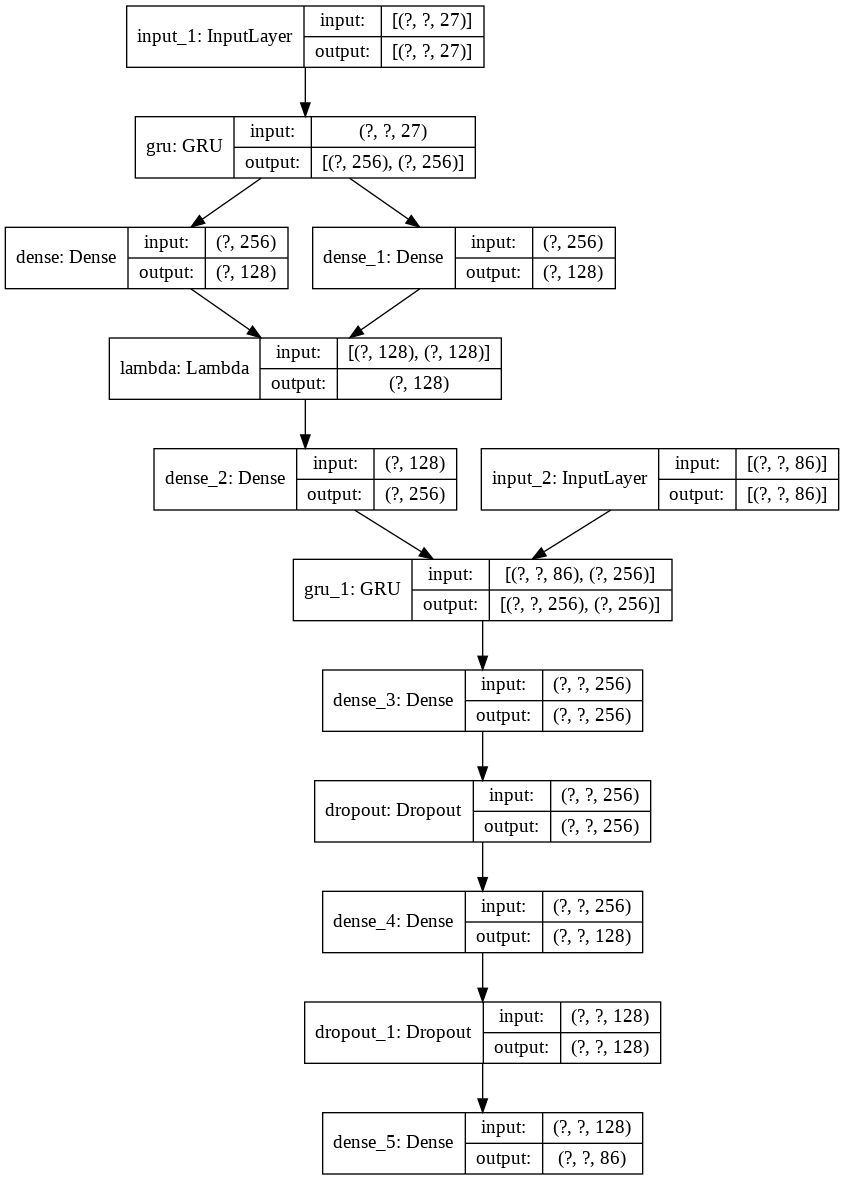

In [77]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

#encoder
encoder_inputs = keras.layers.Input(shape = (None, num_graphemes))
encoder_output, encoder_state = keras.layers.GRU(intermediate_dim, return_state = True)(encoder_inputs)

z_mean = keras.layers.Dense(latent_dim, activation = 'relu')(encoder_state)
z_log_sigma = keras.layers.Dense(latent_dim, activation = 'relu')(encoder_state)

def sampling(args):
  z_mean, z_log_sigma = args
  epsilon = K.random_normal(shape = K.shape(z_mean),
                            mean = 0., stddev = epsilon_std)
  return z_mean + K.exp(z_log_sigma) * epsilon

z = keras.layers.Lambda(sampling, output_shape = (latent_dim,))([z_mean, z_log_sigma])

#decoder
decoder_inputs = keras.layers.Input(shape = (None, num_phonemes))
decoder_dense = keras.layers.Dense(intermediate_dim, activation = 'relu')
encoder_state = decoder_dense(z)
decoder_GRU = keras.layers.GRU(intermediate_dim, return_sequences = True, return_state = True)

decoder_outputs, decoder_state = decoder_GRU(decoder_inputs, initial_state = encoder_state)

dense1 = keras.layers.Dense(256, activation = 'relu')
dense2 = keras.layers.Dense(128, activation = 'relu')
dense3 = keras.layers.Dense(num_phonemes, activation = 'softmax')

decoder_outputs = dense1(decoder_outputs)
decoder_outputs = keras.layers.Dropout(0.2)(decoder_outputs)
decoder_outputs = dense2(decoder_outputs)
decoder_outputs = keras.layers.Dropout(0.2)(decoder_outputs)
decoder_outputs = dense3(decoder_outputs)

# Training model
training_model = keras.models.Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Encoder model
encoder_model = keras.models.Model(encoder_inputs, encoder_state)

# Prediction model
decoder_state_input = keras.layers.Input(shape = (intermediate_dim,))
decoder_outputs, decoder_state = decoder_GRU(decoder_inputs, initial_state = decoder_state_input)
decoder_outputs = dense1(decoder_outputs)
decoder_outputs = dense2(decoder_outputs)
decoder_outputs = dense3(decoder_outputs)
prediction_model = keras.models.Model(
    [decoder_inputs, decoder_state_input], 
    [decoder_outputs, decoder_state])

training_model.summary()
keras.utils.plot_model(training_model, show_shapes = True, show_layer_names = True)
# keras.utils.plot_model(prediction_model, show_shapes = True, show_layer_names = True)
# keras.utils.plot_model(encoder_model, show_shapes=True, show_layer_names=True)

In [0]:
K.clear_session()

In [0]:
def vae_loss(x, x_decoded_mean):
  xent_loss = keras.losses.categorical_crossentropy(x, x_decoded_mean)
  kl_loss = - 0.00001 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))
  loss = xent_loss + kl_loss
  return loss

For training, currently starting at lr = 0.001, and dropping per 20 epochs.

In [79]:
training_model.compile(keras.optimizers.Adam(learning_rate=0.001), loss = vae_loss, metrics = ['accuracy'])
history = training_model.fit([encoder_input_data, decoder_input_data], 
                   decoder_target_data, 
                   batch_size=batch_size, 
                   epochs=epochs, 
                   validation_split=0.2,
                   shuffle = True)

Train on 64791 samples, validate on 16198 samples
Epoch 1/10
64791/64791 [==============================] - 20s 311us/sample - loss: 1.3027 - acc: 0.0937 - val_loss: 1.1144 - val_acc: 0.1195
Epoch 2/10
64791/64791 [==============================] - 19s 297us/sample - loss: 1.0879 - acc: 0.1239 - val_loss: 1.0276 - val_acc: 0.1372
Epoch 3/10
64791/64791 [==============================] - 19s 290us/sample - loss: 1.0047 - acc: 0.1420 - val_loss: 0.9442 - val_acc: 0.1555
Epoch 4/10
64791/64791 [==============================] - 19s 296us/sample - loss: 0.9516 - acc: 0.1555 - val_loss: 0.9050 - val_acc: 0.1666
Epoch 5/10
64791/64791 [==============================] - 19s 291us/sample - loss: 0.9162 - acc: 0.1644 - val_loss: 0.8705 - val_acc: 0.1755
Epoch 6/10
64791/64791 [==============================] - 19s 290us/sample - loss: 0.8905 - acc: 0.1704 - val_loss: 0.8561 - val_acc: 0.1779
Epoch 7/10
64791/64791 [==============================] - 19s 293us/sample - loss: 0.8689 - acc: 0.1757 

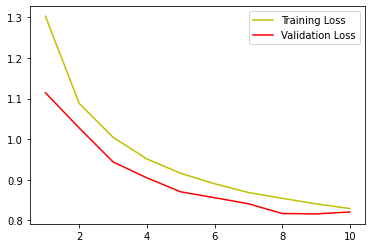

In [80]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.legend()
plt.show()

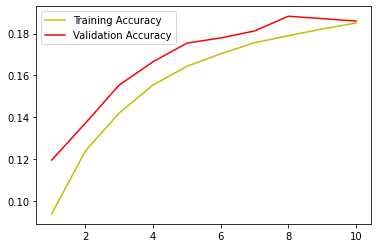

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.legend()
plt.show()

In [0]:
def g2p_categorical(seq):
  seq = seq.upper()
  input_tensor = np.zeros(shape = (1, max_grapheme_length, num_graphemes))

  for j, char in enumerate(seq):
    input_tensor[0, j, char_index[char]] = 1

  decoder_state = encoder_model.predict(input_tensor)

  # Create our '<beg>' token
  prev_phone = np.zeros(shape = (1, 1, num_phonemes))
  prev_phone[0, 0, -2] = 1

  end_reached = False
  pronunciation = '<beg>'
  i = 0
  while not end_reached:
    decoder_output, decoder_state = prediction_model.predict([prev_phone, decoder_state])
    predicted_phone = index_phone[np.argmax(decoder_output)]
    pronunciation += ' ' + predicted_phone
    if predicted_phone == '<end>':
      end_reached = True
    i += 1
    if i == 30:
      end_reached = True
    prev_phone = np.zeros(shape = (1, 1, num_phonemes))
    prev_phone[0, 0, phone_index[predicted_phone]] = 1
  return pronunciation

In [85]:
g2p_categorical("DRAPES")

'<beg> D IH0 S K R IY1 T <end>'

In [158]:
''' Connect to gdrive '''
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import csv
songdata_path = 'gdrive/My Drive/songdata.csv'
with open (songdata_path) as csvfile:
  lyrics = []
  reader = csv.reader(csvfile)
  for row in reader:
    lyrics.append(row[3])
lyrics = lyrics[1:]

In [249]:
lyrics[:5]

["Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWe'll go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?\n\n",
 "Take it easy with me, please  \nTouch me gently like a summer evening breeze  \nTake your time, make it slow  \nAndante, Andante  \nJust let the feeling grow  \n  \nMake your fingers soft and light  \nLet your bo

In [0]:
all_song_lines = []
for song in lyrics[:10]:
  lines = song.splitlines()
  for line in lines:
    # Using 'doggo' as our <beg> token, and 'catto' as our end token.
    line = 'DOGGO ' + line + ' CATTO'
    line_encoding = encode_sentence(line)
    all_song_lines.append(line_encoding)

In [262]:
max([len(x) for x in all_song_lines])

22

In [0]:
# For each line, we have a series of encodings.
max_line_length = max([len(x) for x in all_song_lines])
num_song_lines = len(all_song_lines)

''' Build our data sets for the line modeler. '''

# An (input, max_line_length, encoding_dimension) shaped tensor
line_encoder_input_data = np.zeros(shape = (num_song_lines, max_line_length, latent_dim))

# Same shape as input
line_decoder_target_data = np.zeros(shape = (num_song_lines, max_line_length, latent_dim))

# All extra padding should be encoded as NULL tokens.
for i, line in enumerate(all_song_lines):
  for j, encoding in enumerate(line):
    line_encoder_input_data[i, j, : ] = encoding
    if j > 0:
      line_decoder_target_data[i, j - 1, : ] = encoding

In [0]:
# Shuffle and split our data.
line_encoder_input_data, line_encoder_test, line_decoder_target_data, line_decoder_test = train_test_split(
    line_encoder_input_data, line_decoder_target_data,
    test_size = 0.3,
    random_state = 42,
    shuffle = True
)

In [0]:
# Set our new constants
line_batch_size = 24
line_epochs = 200
line_latent_dim = 512
line_intermediate_dim = 64
epsilon_std = 1.0

In [0]:
K.clear_session()

In [337]:
x = keras.layers.Input(shape = (max_line_length, latent_dim,), batch_size=line_batch_size)
h = keras.layers.GRU(line_intermediate_dim, return_sequences=False)(x)
h = keras.layers.Dense(line_intermediate_dim, activation = 'linear')(h)
z_mean = keras.layers.Dense(line_latent_dim)(h)
z_log_sigma = keras.layers.Dense(line_latent_dim)(h)

def sampling(args):
  z_mean, z_log_sigma = args
  epsilon = K.random_normal(shape = (line_batch_size, line_latent_dim),
                            mean = 0., stddev = epsilon_std)
  return z_mean + K.exp(z_log_sigma) * epsilon

z = keras.layers.Lambda(sampling, output_shape = (line_latent_dim,))([z_mean, z_log_sigma])

repeated_context = keras.layers.RepeatVector(max_line_length)

decoder_h = keras.layers.GRU(line_intermediate_dim, return_sequences = True)
decoder_mean = keras.layers.GRU(latent_dim, return_sequences=True)

h_decoded = decoder_h(repeated_context(z))
x_decoded_mean = decoder_mean(h_decoded)

vae = keras.models.Model(x, x_decoded_mean)

encoder = keras.models.Model(x, z_mean)

line_decoder_input = keras.layers.Input(shape = (line_latent_dim,))
_h_decoded = decoder_h(repeated_context(line_decoder_input))
_x_decoded_mean = decoder_mean(_h_decoded)
generator = keras.models.Model(line_decoder_input, _x_decoded_mean)

def vae_loss(x, x_decoded_mean):
  xent_loss = keras.losses.mse(x, x_decoded_mean)
  kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma))
  loss = xent_loss + kl_loss
  return loss

# keras.utils.plot_model(vae, show_shapes = True, show_layer_names = True)
vae.summary()

Model: "model_73"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_63 (InputLayer)           [(24, 22, 256)]      0                                            
__________________________________________________________________________________________________
gru_56 (GRU)                    (24, 64)             61632       input_63[0][0]                   
__________________________________________________________________________________________________
dense_107 (Dense)               (24, 64)             4160        gru_56[0][0]                     
__________________________________________________________________________________________________
dense_108 (Dense)               (24, 512)            33280       dense_107[0][0]                  
___________________________________________________________________________________________

In [338]:
vae.compile(optimizer = 'rmsprop', loss = vae_loss)
vae.fit(line_encoder_input_data, line_decoder_target_data,
        shuffle = True,
        epochs = line_epochs,
        batch_size = line_batch_size,
        validation_split = 0.2)

Train on 221 samples, validate on 56 samples
Epoch 1/200
216/221 [============================>.] - ETA: 0s - loss: 0.1449

InvalidArgumentError: ignored

In [0]:
def gen_word(encoding):
  states = encoding
  # Create our '<beg>' token
  prev_phone = np.zeros(shape = (1, 1, num_phonemes))
  prev_phone[0, 0, -2] = 1

  end_reached = False
  pronunciation = '<beg>'
  i = 0
  while not end_reached:
    decoder_output, states = prediction_model.predict([prev_phone] + [states])
    predicted_phone = index_phone[np.argmax(decoder_output)]
    pronunciation += ' ' + predicted_phone
    if predicted_phone == '<end>':
      end_reached = True
    i += 1
    if i == 30:
      end_reached = True
    prev_phone = np.zeros(shape = (1, 1, num_phonemes))
    prev_phone[0, 0, phone_index[predicted_phone]] = 1
  return pronunciation


In [258]:
gen_word(encode_word("APPLE"))

'<beg> L AE1 N D <end>'